In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.shape

(5572, 5)

# Data Cleaning

In [6]:
data=data.iloc[:,0:2]
#data.drop[columns=['',''],inplace=True]

In [7]:
data.shape

(5572, 2)

In [8]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
data['target']=encoder.fit_transform(data['target'])
#ham=0 spam=1

In [12]:
data.sample(5)

,target,text
2887,0,I take it we didn't have the phone callon Frid...
4789,0,Yup. Izzit still raining heavily cos i'm in e ...
2849,0,She's fine. Good to hear from you. How are you...
1947,0,The battery is for mr adewale my uncle. Aka Egbon
3834,0,I'm thinking that chennai forgot to come for a...


In [13]:
#check for duplicate values\
data.duplicated().sum()

403

In [14]:
#remove duplicates
data=data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

# EDA

In [17]:
import matplotlib.pyplot as plt

In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

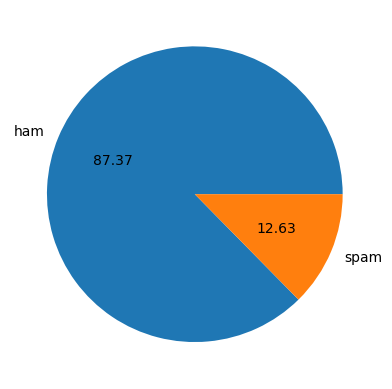

In [19]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
#Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihir15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mihir15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
data['num_characters']=data['text'].apply(len)

In [24]:
#no of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

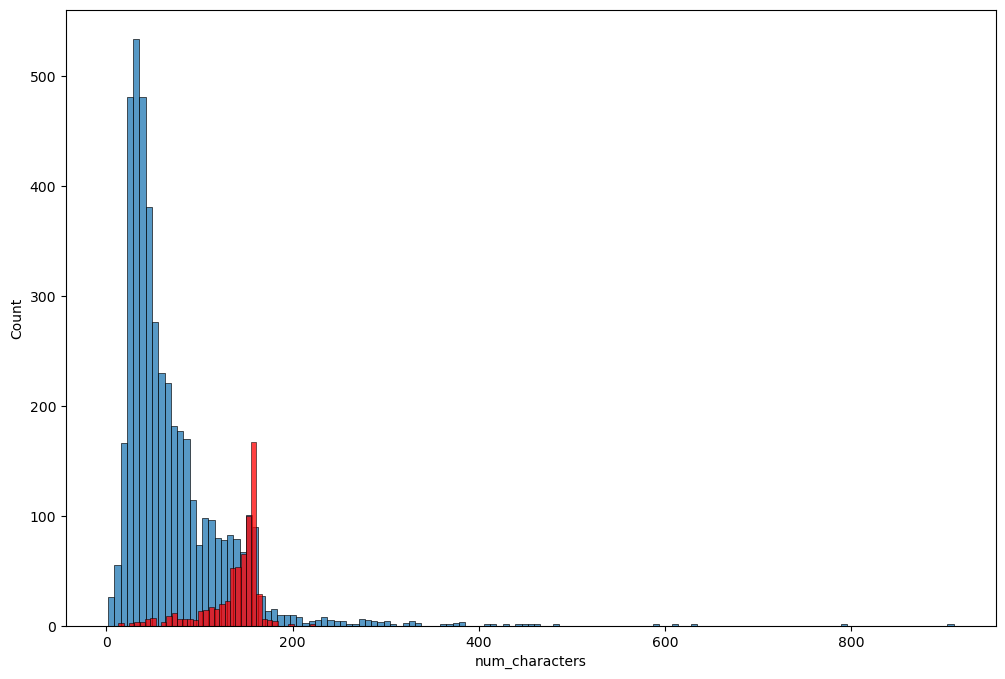

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']== 0]['num_characters'])
sns.histplot(data[data['target']== 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

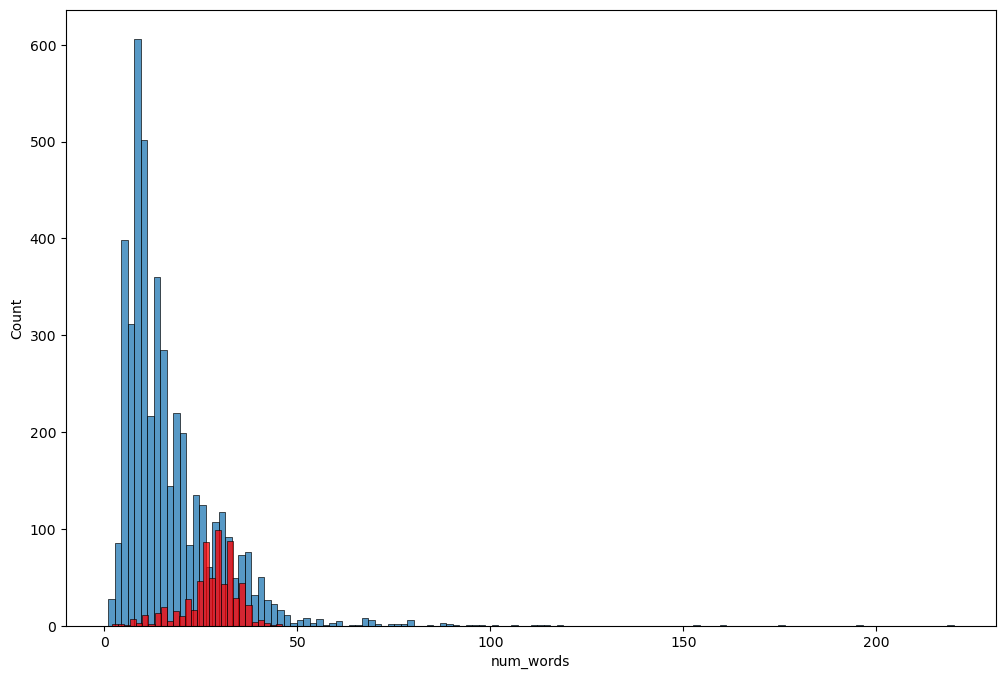

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']== 0]['num_words'])
sns.histplot(data[data['target']== 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

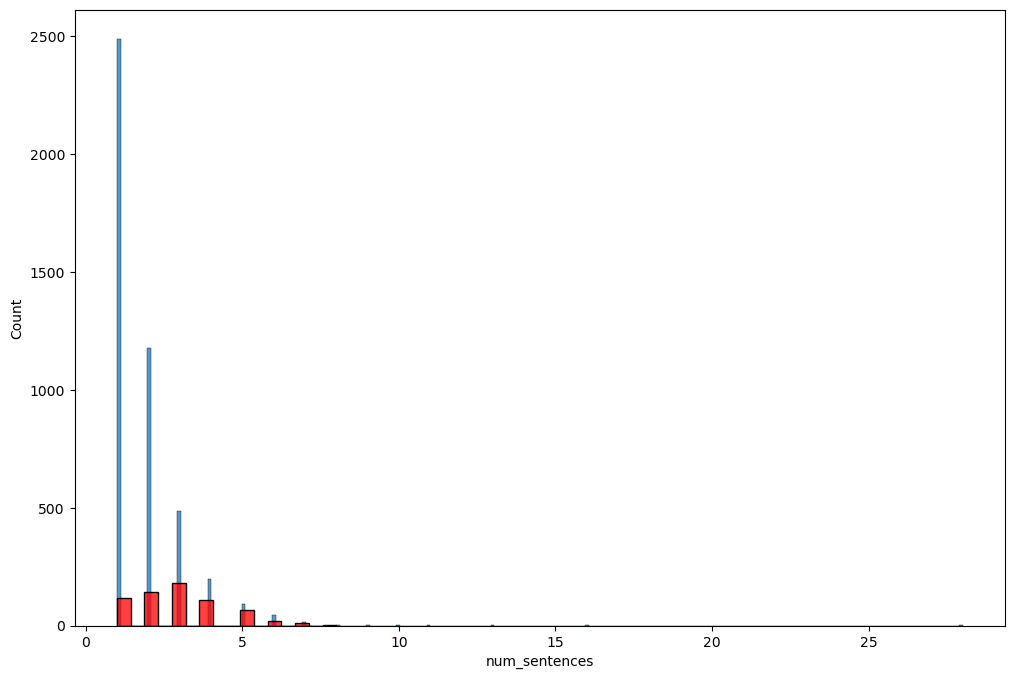

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']== 0]['num_sentences'])
sns.histplot(data[data['target']== 1]['num_sentences'],color='red')

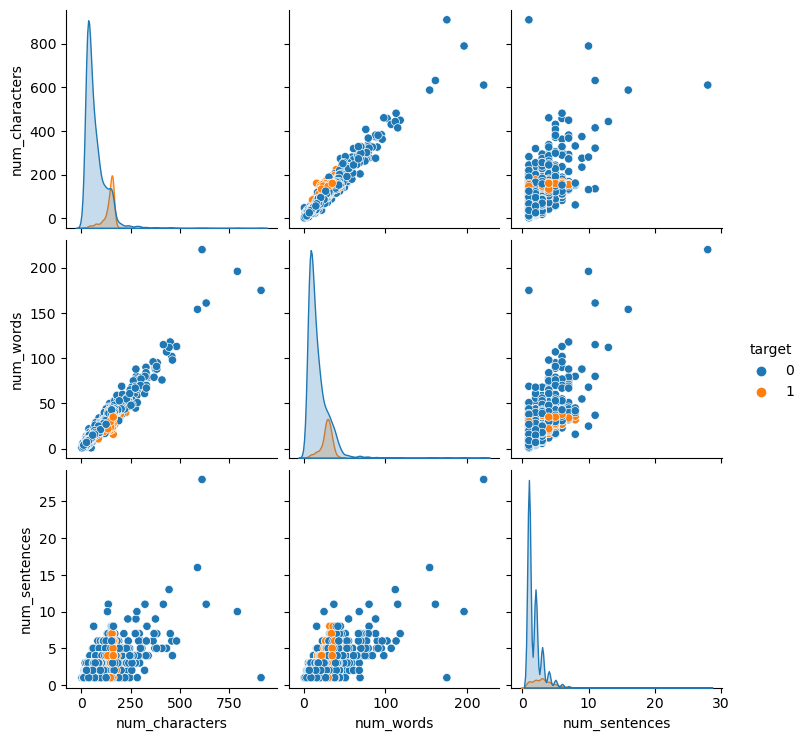

In [31]:
sns.pairplot(data,hue='target')

C:\Users\Mihir15\AppData\Local\Temp\ipykernel_20856\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

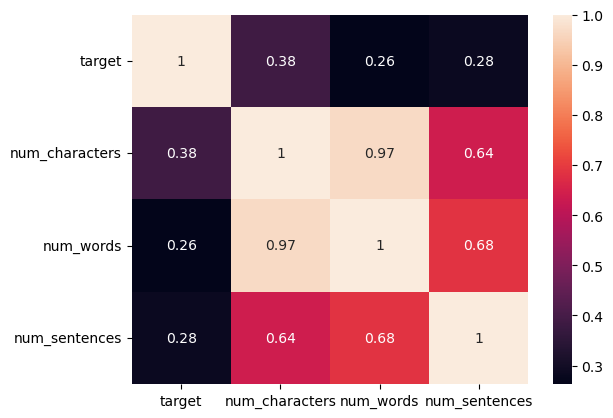

In [32]:
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

1.LowerCase
2.Tokenization
3.Removing special characters
4.Removing stop words and punctuation
5.Stemming

In [33]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
import string

In [35]:
def transfrom_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [36]:
data['transformed_text']=data["text"].apply(transfrom_text)

In [37]:
data

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [39]:
spam_wc=wc.generate(data[data['target'] ==1 ]['transformed_text'].str.cat(sep=" "))

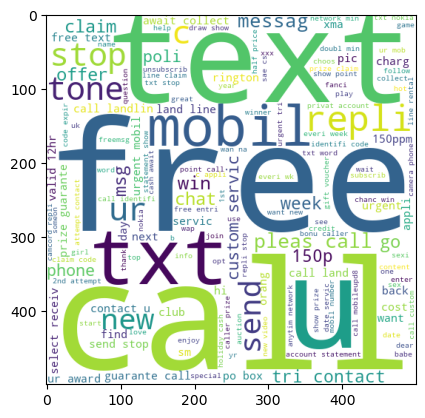

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc=wc.generate(data[data['target'] ==0 ]['transformed_text'].str.cat(sep=" "))

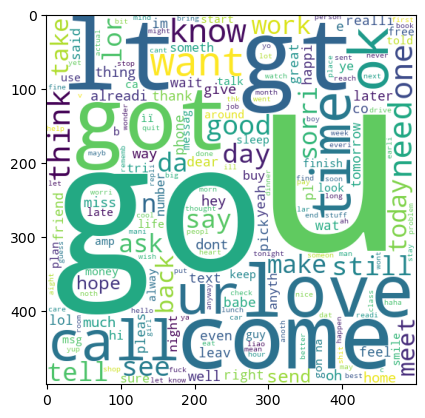

In [42]:
plt.imshow(ham_wc)

In [43]:
spam_corpus=[]
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split(" "):
        spam_corpus.append(word)
        
        #text is converted in list formate and than splitted in token and sotred in spam_corpus

In [44]:
len(spam_corpus)

9939

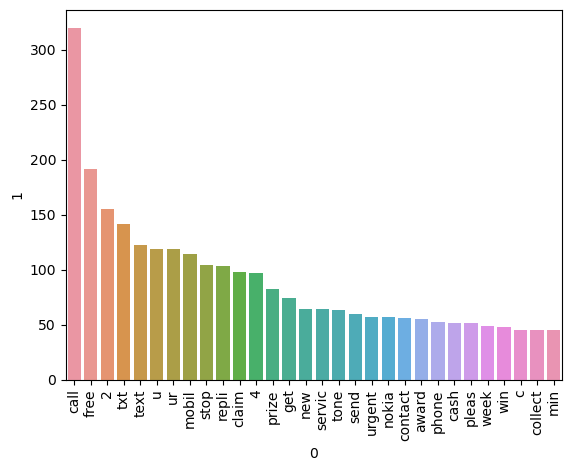

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()
#Create dictionary return how many times single word is used 

In [46]:
ham_corpus=[]
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split(" "):
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35403

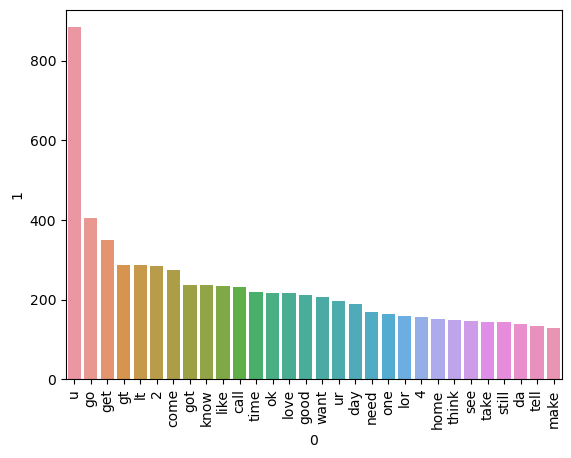

In [48]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()
#top 30 words in ham msg/sms

Model Buliding

Navie baye algorithm for textual data

In [49]:
#text to vectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [51]:
X.shape

(5169, 3000)

In [52]:
y=data['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [59]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [60]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl',"wb"))
pickle.dump(bnb,open("model.pkl","wb"))